In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset=pd.read_csv("Mall_Customers.csv")
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
#CLUSTERING IS BEST FOR TARGET MARKETTING
 #NO OUTPUT PRESENT FOR CLUSTERIN-UNSUPERVISED LEARNING
# NO PREDICTION NEEDED LY CLUSTERING OF GROUPS IS REQUIRED

In [4]:
X= dataset.iloc[:,[3,4]].values #to bring particular column 
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [5]:
# HIERARCHICAL OR AGGLOMERATIVE CLUSTERING

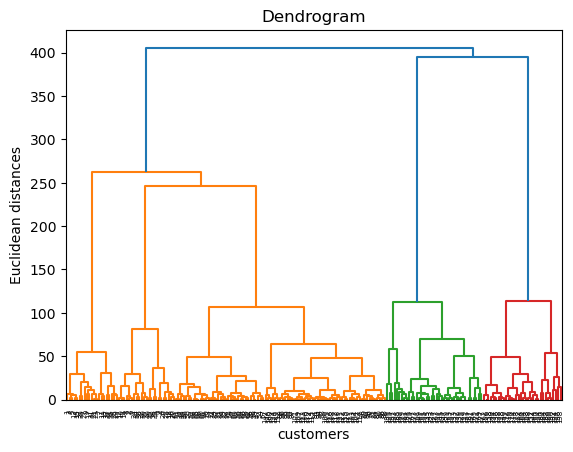

In [6]:
import scipy.cluster.hierarchy as sch
Dendrogram= sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendrogram')
plt.xlabel('customers')
plt.ylabel('Euclidean distances')
plt.show()

In [7]:
#spectral clustering

In [8]:
from sklearn.cluster import SpectralClustering
sc=SpectralClustering(n_clusters=2 , assign_labels = 'discretize', random_state=0)
SC=sc.fit_predict(X)

C:\Anaconda\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:455: UserWarning: Exited at iteration 446 with accuracies 
[3.50876525e-15 4.26493817e-06 2.74148648e-06]
not reaching the requested tolerance 2.9802322387695312e-06.
Use iteration 446 instead with accuracy 
2.3354748826538286e-06.

  _, diffusion_map = lobpcg(
C:\Anaconda\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:455: UserWarning: Exited postprocessing with accuracies 
[1.63523107e-15 4.26493866e-06 2.74148571e-06]
not reaching the requested tolerance 2.9802322387695312e-06.
  _, diffusion_map = lobpcg(


In [9]:
supervised = pd.DataFrame(dataset) # or only dataset
supervised['cluster_group']=SC
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster_group
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,0
197,198,Male,32,126,74,1
198,199,Male,32,137,18,1


C:\Anaconda\Lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


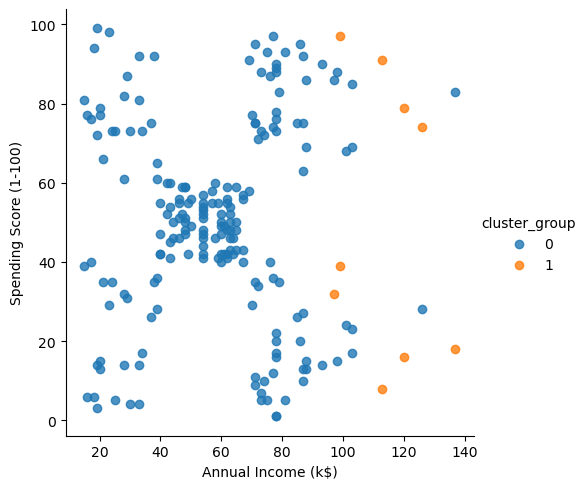

In [10]:
import seaborn as sns #hue for colour
facet = sns.lmplot(data=supervised , x=supervised.columns[3] , y=supervised.columns[4] , hue= supervised.columns[5],
                   fit_reg=False , legend= True , legend_out=True)

In [11]:
#evaluation silhouette index

In [12]:
from sklearn.metrics import silhouette_score
print(silhouette_score(X, SC))

0.3488542350983333
